# Logistic Regression

In this exercise, you will implement logistic regression and apply it. 


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Logistic Regression](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Loading and visualizing the data](#2.2)
  - [ 2.3  Sigmoid function](#2.3)
  - [ 2.4 Cost function for logistic regression](#2.4)
  - [ 2.5 Gradient for logistic regression](#2.5)
  - [ 2.6 Learning parameters using gradient descent ](#2.6)
  - [ 2.7 Plotting the decision boundary](#2.7)
  - [ 2.8 Evaluating logistic regression](#2.8)

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
-  ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

<a name="2"></a>
## 2 - Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

<a name="2.1"></a>
### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

<a name="2.2"></a>
### 2.2 Loading and visualizing the data

You will start by loading the dataset for this task. 
- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains exam scores on two exams for a student
  - `y_train` is the admission decision 
      - `y_train = 1` if the student was admitted 
      - `y_train = 0` if the student was not admitted 
  - Both `X_train` and `y_train` are numpy arrays.


In [40]:
# load dataset
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y
X_train, y_train = load_data("ex2data1.txt")

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first five values of `X_train` and the type of the variable.

In [41]:
#"Incomplete code - your contribution needed."


print("First five elements in X_train are:\n", X_train[:5] )
print("Type of X_train:", type(X_train) )

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


Now print the first five values of `y_train`

In [42]:
#"Incomplete code - your contribution needed."

print("First five elements in y_train are:\n", y_train[:5] )
print("Type of y_train:",   type(y_train)  )

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [43]:
#"Incomplete code - your contribution needed."
x_shape = X_train.shape
y_shape = y_train.shape

print ('The shape of X_train is: ' + str(x_shape) )
print ('The shape of y_train is: ' +  str(y_shape) )
print('We have m = %d training examples' % len(X_train))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


**Expected Output**:

<img src="figure 5.png">

#### Visualize your data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot (as shown below), where the axes are the two exam scores, and the positive and negative examples are shown with different markers.
- We use a helper function in the ``utils.py`` file to generate this plot. 

<img src="figure 1.png" width="450" height="450">



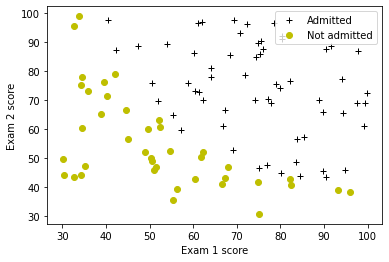

In [44]:
# Plot examples

def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

Your goal is to build a logistic regression model to fit this data.
- With this model, you can then predict if a new student will be admitted based on their scores on the two exams.

<a name="2.3"></a>
### 2.3  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>
### Exercise 1
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that 
- `z` is not always a single number, but can also be an array of numbers. 
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [45]:
#"Incomplete code - your contribution needed."




# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    g = 1/(1+ np.exp(-1*z))
  
    
    ### END SOLUTION ###  
    
    return g

When you are finished, try testing a few values by calling `sigmoid(x)` in the cell below. 
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. 
- Evaluating `sigmoid(0)` should give you exactly 0.5. 


In [46]:
# Note: You can edit this value
# Try with the different values


value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


**Expected Output**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
    
- As mentioned before, your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [47]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td> 
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td> 
  </tr>    
  
</table>

<a name="2.4"></a>
### 2.4 Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Exercise 2

Please complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* You can use the sigmoid function that you implemented above for this part.


In [48]:
#"Incomplete code - your contribution needed."
# Use vectorization.


# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    
#     w = w.reshape((1, 1))


    z = np.dot(X_train, w) + b
#     print("Z: ")
#     print(z)
    predicted_y = sigmoid(z)
#     print("Predicted Y: ")
#     print(predicted_y)
    
    total_cost = (-1 / m) * np.sum(y * np.log(predicted_y) + (1 - y) * np.log(1 - predicted_y))


    
    ### END CODE HERE ### 

    return total_cost

Run the cells below to check your implementation of the `compute_cost` function with two different initializations of the parameters $w$ and $b$

In [49]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w and b (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [50]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))


# UNIT TESTS
# compute_cost_test(compute_cost)

Cost at test w and b (non-zeros): 0.218


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at test w and b (non-zeros):<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 Gradient for logistic regression

In this section, you will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0.....n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously


<a name='ex-03'></a>
### Exercise 3

Please complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

As before, you can use the sigmoid function that you implemented above and if you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [89]:
#"Incomplete code - your contribution needed."
# Use vectorization.



# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
   
    z = np.dot(X_train, w) + b
#     print("Z: ")
#     print(z)
    predicted_y = sigmoid(z)
#     print("Predicted Y: ")
#     print(predicted_y)
    
    # Number of training examples
#     m = x.shape[0]
    
    # You need to return the following variables correctly
   
#     dj_dw1 =0
#     dj_db1 = 0
    
#     ### START CODE HERE ###
    
#     dj_db1 = (predicted_y - y_train)
    
#     print(predicted_y.shape)
#     print(y_train.shape)
#     print(X_train.shape)
    
    
    
    
#     dj_dw1 = (predicted_y - y_train).T * X_train
#     #dj_dw1 = ((predicted_y - y_train.reshape(100, 1)).reshape(1, 100)) * X_train.T
#     #dj_dw1 = ((predicted_y - y_train.reshape(1, -1)) * X_train)
#     #dj_dw1 = ((predicted_y.reshape(-1, 1) - y_train.reshape(1, -1)) * X_train)
#     #dj_dw1 = (predicted_y[:, np.newaxis] - y_train) * X_train

    
    
#     dj_db = (1/(m) * (dj_db1.sum()))
#     dj_dw = (1/(m) * (dj_dw1.sum()))
    
    y = predicted_y - y
    
    dj_dw = np.dot(X.T, y) / m
    dj_db = np.sum(y) / m
    
    ### END CODE HERE ###

        
    return dj_db, dj_dw

Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$ and $b$

In [90]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.009216589291151, -11.262842205513593]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w and b (zeros)<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at initial w and b (zeros):<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [53]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

# UNIT TESTS    
# compute_gradient_test(compute_gradient)

dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at test w and b (non-zeros)<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at test w and b (non-zeros):<b></td>
    <td>  [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using gradient descent 

Similar to the previous assignment, you will now find the optimal parameters of a logistic regression model by using gradient descent. 
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [72]:
#"Incomplete code - your contribution needed."



def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X_train)
    
  
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x,y, w_in, b_in,  lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note**
The code block below takes a couple of minutes to run, especially with a non-vectorized version. You can reduce the `iterations` to test your implementation and iterate faster. If you have time later, try running 100,000 iterations for better results.

In [74]:
print("hELLO")
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

hELLO
Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


<details>
<summary>
    <b>Expected Output: Cost     0.30, (Click to see details):</b>
</summary>

    # With the following settings
    np.random.seed(1)
    initial_w = 0.01 * (np.random.rand(2) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
```

<a name="2.7"></a>
### 2.7 Plotting the decision boundary

We will now use the final parameters from gradient descent to plot the linear fit. If you implemented the previous parts correctly, you should see a plot similar to the following plot:   
<img src="figure 2.png"  width="450" height="450">

We will use a helper function in the `utils.py` file to create this plot.

In [75]:
# def plot_decision_boundary(w, b, X, y):
#     # Credit to dibgerge on Github for this plotting code
     
#     plot_data(X[:, 0:2], y)
    
#     if X.shape[1] <= 2:
#         plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
#         plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
#         plt.plot(plot_x, plot_y, c="b")
        
#     else:
#         u = np.linspace(-1, 1.5, 50)
#         v = np.linspace(-1, 1.5, 50)
        
#         z = np.zeros((len(u), len(v)))

#         # Evaluate z = theta*x over the grid
#         for i in range(len(u)):
#             for j in range(len(v)):
#                 z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
#         # important to transpose z before calling contour       
#         z = z.T
        
#         # Plot z = 0.5
#         plt.contour(u,v,z, levels = [0.5], colors="g")

[0.07125355 0.06482888] -8.188622906639244
[0.07125355 0.06482888] -8.188622906639244


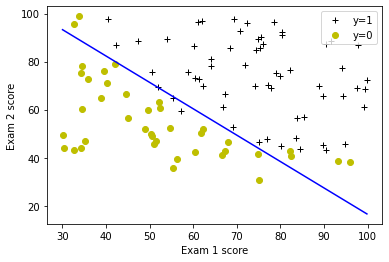

In [76]:
print(w, b)
plot_decision_boundary(w, b, X_train, y_train)
print(w, b)

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

<a name="2.8"></a>
### 2.8 Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set. 

You will implement the `predict` function below to do this.


<a name='ex-04'></a>
### Exercise 4

Please complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First you need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ for every example 
    - You've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, you can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
    
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [80]:
#"Incomplete code - your contribution needed."


# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 

    # Compute the linear combinations
    z = np.dot(X, w) + b  # Calculate z_wb for all examples


    # Apply the sigmoid function
    predicted_y = sigmoid(z)    # Apply sigmoid to z_wb for all examples
    
    # Apply the threshold
    p = (predicted_y > 0.5).astype(int)  # Apply threshold and convert to int


    ### END CODE HERE ### 
    return p

Once you have completed the function `predict`, let's run the code below to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [81]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0 1 1 1]
All tests passed!


**Expected output** 

<table>
  <tr>
    <td> <b>Output of predict: shape (4,),value [0. 1. 1. 1.]<b></td>
  </tr>
</table>

Now let's use this to compute the accuracy on the training set

In [82]:
#"Incomplete code - your contribution needed."


#Compute accuracy on our training set
p = predict(X_train, w,b)

print('Train Accuracy: %f' % (np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


<table>
  <tr>
    <td> <b>Train Accuracy (approx):<b></td>
    <td> 92.00 </td> 
  </tr>
</table>

**Congratulations on completing another programing assignmnet. Now you can solve many regression problems as well as clasification problems**